
Cleaned and Processed Time Series Data:
        Date     Value  Smoothed_Value
0 2024-01-01  0.897959        0.897959
1 2024-01-02  0.637472        0.767715
2 2024-01-03  0.637472        0.724301
3 2024-01-04  0.673469        0.711593
4 2024-01-05  0.275510        0.624376


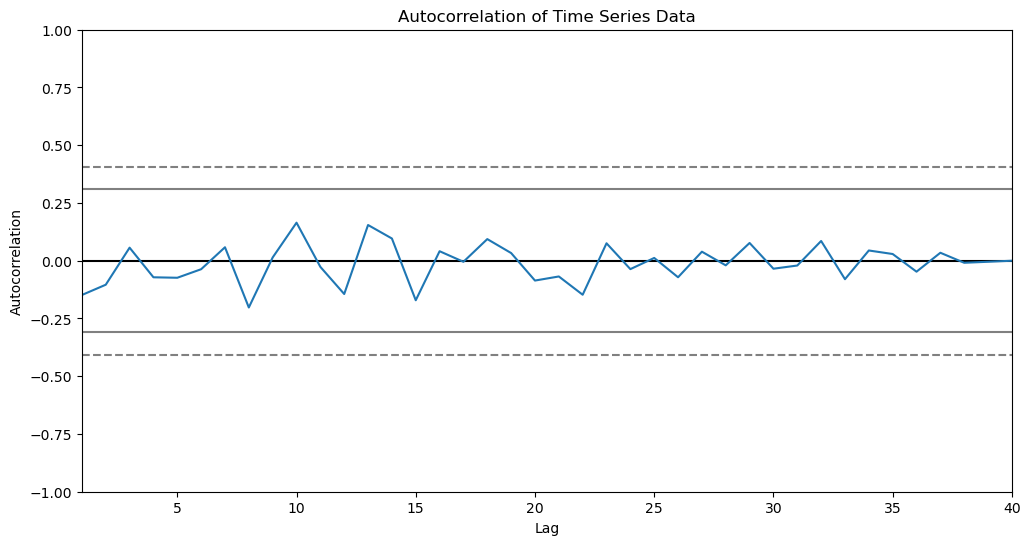

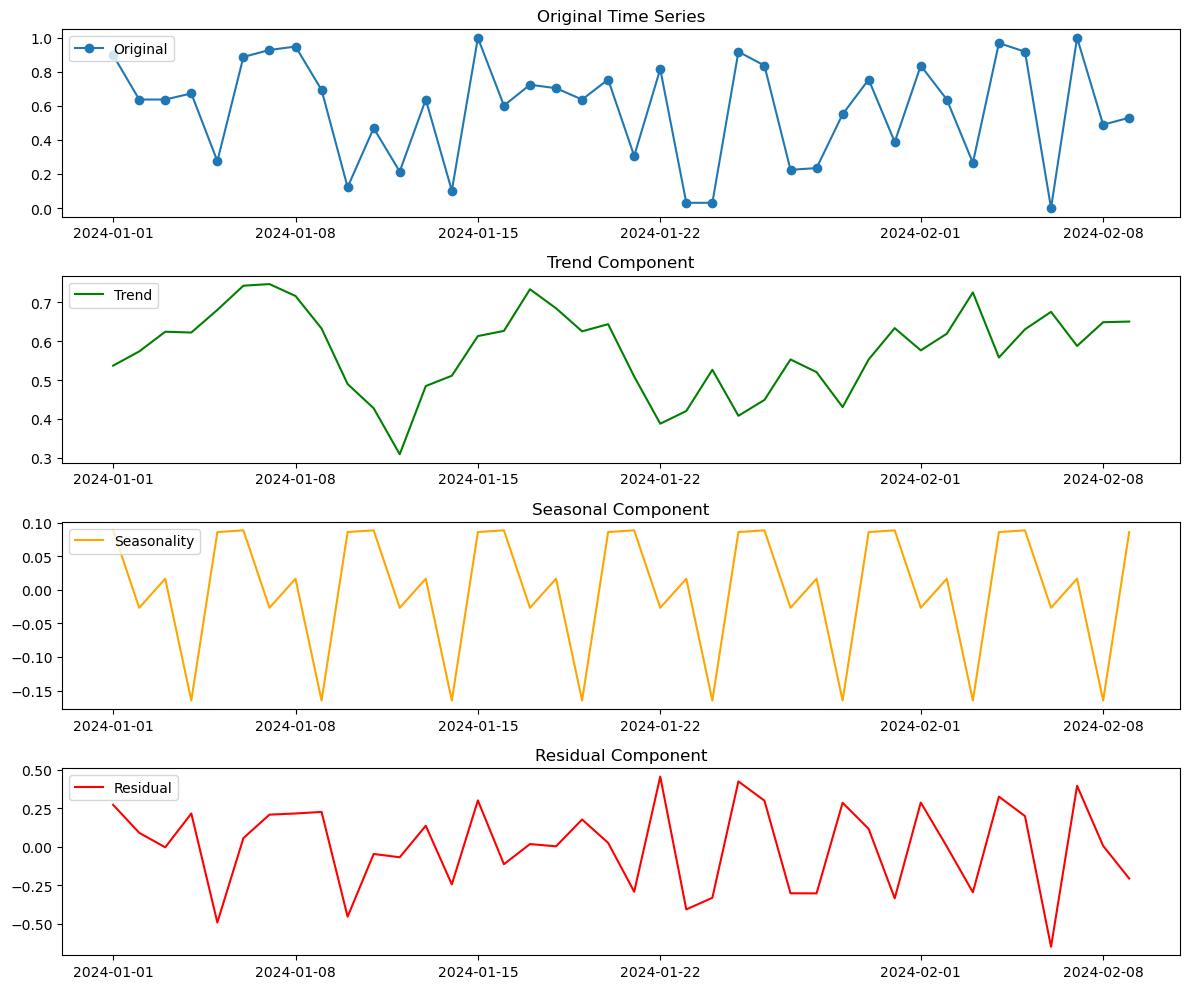

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

# Generate random time series data (40 samples)
n_samples = 40
dates = pd.date_range(start='2024-01-01', periods=n_samples, freq='D')
data = np.random.randint(50, 150, size=n_samples).astype(float)

# Introduce some missing values and outliers
indices_with_nan = np.random.choice(n_samples, size=4, replace=False)
data[indices_with_nan] = np.nan  # Missing values

data[np.random.randint(0, n_samples)] *= 5  # Outlier

df = pd.DataFrame({'Date': dates, 'Value': data})

# Handling Missing Values (Fill with mean value)
df['Value'].fillna(df['Value'].mean(), inplace=True)

# Handling Outliers (Capping at 99th percentile)
upper_limit = df['Value'].quantile(0.99)
df['Value'] = np.where(df['Value'] > upper_limit, df['Value'].median(), df['Value'])

# Normalization (Min-Max Scaling)
df['Value'] = (df['Value'] - df['Value'].min()) / (df['Value'].max() - df['Value'].min())

# Moving Average Smoothing (Window = 5)
df['Smoothed_Value'] = df['Value'].rolling(window=5, min_periods=1).mean()

print("\nCleaned and Processed Time Series Data:")
print(df.head())

# Visualization 1: Autocorrelation Plot
plt.figure(figsize=(12, 6))
autocorrelation_plot(df['Value'])
plt.title('Autocorrelation of Time Series Data')
plt.grid()
plt.show()

# Visualization 2: Time Series Decomposition (Trend, Seasonality, Residual)
decomposition = seasonal_decompose(df['Value'], period=5, model='additive', extrapolate_trend='freq')

plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(df['Date'], df['Value'], label='Original', marker='o', linestyle='-')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(df['Date'], decomposition.trend, label='Trend', color='green')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(df['Date'], decomposition.seasonal, label='Seasonality', color='orange')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(df['Date'], decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()